In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
prev_results = pd.read_excel("metrics_data.xlsx", index_col=0)
prev_results

,Classifier,Measure,Feature selection technique,Value,Rounded value,Percentage
0,MLPClassifier(),CCR,No feature selection,0.962008,0.962,96.2
1,MLPClassifier(),TPR,No feature selection,0.972559,0.973,97.3
2,MLPClassifier(),TNR,No feature selection,0.948560,0.949,94.9
3,MLPClassifier(),GM,No feature selection,0.960484,0.960,96.0
4,MLPClassifier(),CCR,Wrapper,0.965626,0.966,96.6
...,...,...,...,...,...,...
91,Naive Bayes,GM,PCA,0.894017,0.894,89.4
92,Naive Bayes,CCR,IG,0.919493,0.919,91.9
93,Naive Bayes,TPR,IG,0.946731,0.947,94.7
94,Naive Bayes,TNR,IG,0.884774,0.885,88.5


In [3]:
raw_data = loadarff("Training Dataset.arff")
df = pd.DataFrame(raw_data[0])
for c in df.columns:
    df[c] = df[c].apply(lambda x: int(x.decode('ascii')))  # remove weird binary values, leave as string for now
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
X = df.loc[:, df.columns != "Result"]
y = df.loc[:, "Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# PCA combined with Sequential Feature Selection, hyperparameter tuning included

In [5]:
def correct_classification_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y[i] != y_hat[i]:
            FP += 1
        if y[i] == y_hat[i] == -1:
            TN += 1
        if y_hat[i] == -1 and y[i] != y_hat[i]:
            FN += 1

    return (TP + TN) / (TP + FP + FN + TN)


def true_positive_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y[i] != y_hat[i]:
            FP += 1
        if y[i] == y_hat[i] == -1:
            TN += 1
        if y_hat[i] == -1 and y[i] != y_hat[i]:
            FN += 1

    return TP / (TP + FN)


def true_negative_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y[i] != y_hat[i]:
            FP += 1
        if y[i] == y_hat[i] == -1:
            TN += 1
        if y_hat[i] == -1 and y[i] != y_hat[i]:
            FN += 1

    return TN / (TN + FP)


def geometric_mean(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y[i] != y_hat[i]:
            FP += 1
        if y[i] == y_hat[i] == -1:
            TN += 1
        if y_hat[i] == -1 and y[i] != y_hat[i]:
            FN += 1

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    return np.sqrt(TPR * TNR)

In [6]:
# BPNN
from sklearn.neural_network import MLPClassifier
# NB
from sklearn.naive_bayes import CategoricalNB
# SVM
from sklearn.svm import SVC
# C4.5 - decision tree
from sklearn.tree import DecisionTreeClassifier
# knn
from sklearn.neighbors import KNeighborsClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

# All the results will be stored in a single dictionary
optimal_features_data = dict()

In [7]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(X_train)
X_train_ordinal = enc.transform(X_train)
X_test_ordinal = enc.transform(X_test)

In [8]:
from sklearn.feature_selection import chi2, SelectFpr
from sklearn.model_selection import GridSearchCV


def chi2_feature_selection_with_grid_search(clf_class, param_grid_dict, X_train, X_test, y_train):
    select = SelectFpr(chi2, alpha=0.01).fit(X_train, y_train)

    X_train_selected = select.transform(X_train)
    X_test_selected = select.transform(X_test)

    gs = GridSearchCV(
        estimator=clf_class(),
        param_grid=param_grid_dict,
        scoring='accuracy',
        n_jobs=6,
        cv=3
    )

    gs.fit(X_train_selected, y_train)

    return gs.best_params_, X_train_selected, X_test_selected

In [9]:
CLASSIFIERS = [MLPClassifier, CategoricalNB, SVC, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier]
# CLASSIFIERS = [CategoricalNB, SVC, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier]
# CLF_INTERNAL_NAMES = ["CNB", "SVC", "DT", "KNN", "RF"]
CLF_INTERNAL_NAMES = ["MLPC", "CNB", "SVC", "DT", "KNN", "RF"]
CLF_PARAMETERS = dict()
CLF_PARAMETERS["MLPC"] = {"hidden_layer_sizes": list(range(10, 100, 10)),
                          "learning_rate_init": np.linspace(0.001, 0.01, 10)}
CLF_PARAMETERS["CNB"] = {"alpha": np.linspace(0, 5, 10)}
CLF_PARAMETERS["SVC"] = {"C": np.linspace(1, 5, 20), "degree": list(range(5))}
CLF_PARAMETERS["DT"] = {"criterion": ["gini", "entropy", "log_loss"], "max_depth": list(range(1, 30, 2))}
CLF_PARAMETERS["KNN"] = {"n_neighbors": [7], "metric": ["cityblock"]}
CLF_PARAMETERS["RF"] = {"n_estimators": list(range(100, 500, 20)), "criterion": ["gini", "entropy", "log_loss"],
                        "max_depth": list(range(1, 30, 2))}

MEASURES = [correct_classification_rate, true_positive_rate, true_negative_rate, geometric_mean]
MEASURE_NAMES = ["CCR", "TPR", "TNR", "GM"]

In [10]:
prev_results

,Classifier,Measure,Feature selection technique,Value,Rounded value,Percentage
0,MLPClassifier(),CCR,No feature selection,0.962008,0.962,96.2
1,MLPClassifier(),TPR,No feature selection,0.972559,0.973,97.3
2,MLPClassifier(),TNR,No feature selection,0.948560,0.949,94.9
3,MLPClassifier(),GM,No feature selection,0.960484,0.960,96.0
4,MLPClassifier(),CCR,Wrapper,0.965626,0.966,96.6
...,...,...,...,...,...,...
91,Naive Bayes,GM,PCA,0.894017,0.894,89.4
92,Naive Bayes,CCR,IG,0.919493,0.919,91.9
93,Naive Bayes,TPR,IG,0.946731,0.947,94.7
94,Naive Bayes,TNR,IG,0.884774,0.885,88.5


In [11]:
for clf, internal_name in zip(CLASSIFIERS, CLF_INTERNAL_NAMES):
    best_params, X_train_selected, X_test_selected = chi2_feature_selection_with_grid_search(clf, CLF_PARAMETERS[
        internal_name], X_train_ordinal, X_test_ordinal, y_train)

    new_clf = clf(**best_params).fit(X_train_selected, y_train)

    for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
        measure_value = measure_func(new_clf, X_test_selected, y_test.reset_index(drop=True))

        prev_results.loc[len(prev_results.index)] = [str(clf()), measure_name, "CHI2", measure_value,
                                                     round(measure_value, 3), 100 * round(measure_value, 3)]

MLPClassifier()
CategoricalNB()
SVC()
DecisionTreeClassifier()


C:\Users\karlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\karlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\karlo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\karlo\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater tha

KNeighborsClassifier()
RandomForestClassifier()


C:\Users\karlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\karlo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\karlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\karlo\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\karlo\anaconda3\lib\site-packag

In [ ]:
prev_results.to_excel("improved_metric_data.xlsx")

In [17]:
results = prev_results
results.replace("Naive Bayes", "CategoricalNB()", inplace=True)
MEASURE_NAMES = ["CCR", "TPR", "TNR", "GM", "CHI2"]
results

,Classifier,Measure,Feature selection technique,Value,Rounded value,Percentage
0,MLPClassifier(),CCR,No feature selection,0.962008,0.962,96.2
1,MLPClassifier(),TPR,No feature selection,0.972559,0.973,97.3
2,MLPClassifier(),TNR,No feature selection,0.948560,0.949,94.9
3,MLPClassifier(),GM,No feature selection,0.960484,0.960,96.0
4,MLPClassifier(),CCR,Wrapper,0.965626,0.966,96.6
...,...,...,...,...,...,...
115,KNeighborsClassifier(),GM,CHI2,0.942160,0.942,94.2
116,RandomForestClassifier(),CCR,CHI2,0.960199,0.960,96.0
117,RandomForestClassifier(),TPR,CHI2,0.976993,0.977,97.7
118,RandomForestClassifier(),TNR,CHI2,0.939638,0.940,94.0


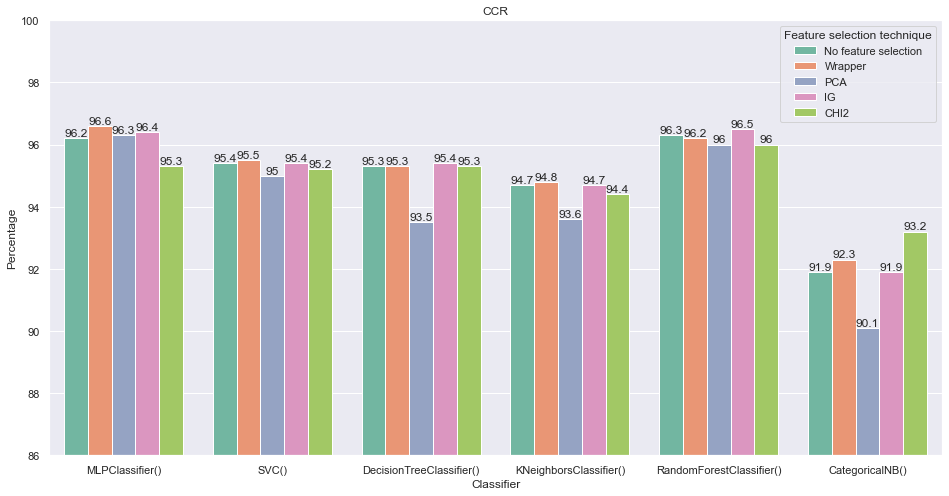

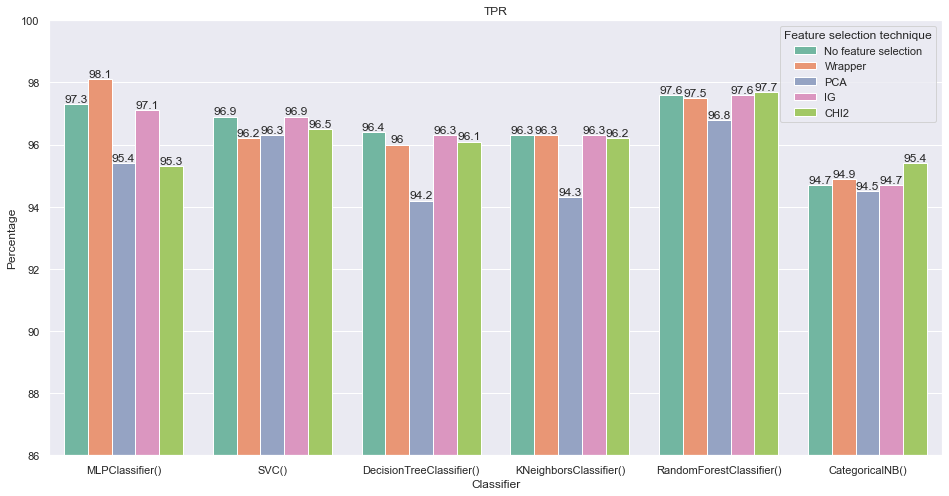

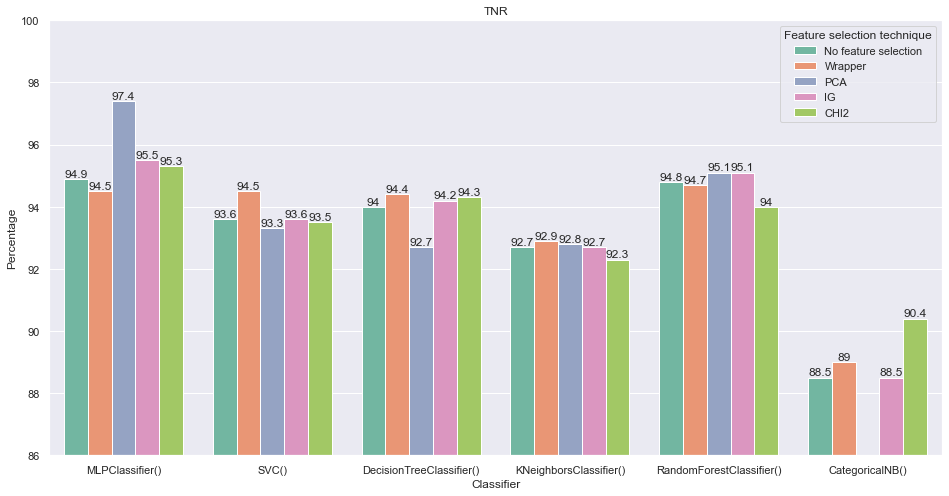

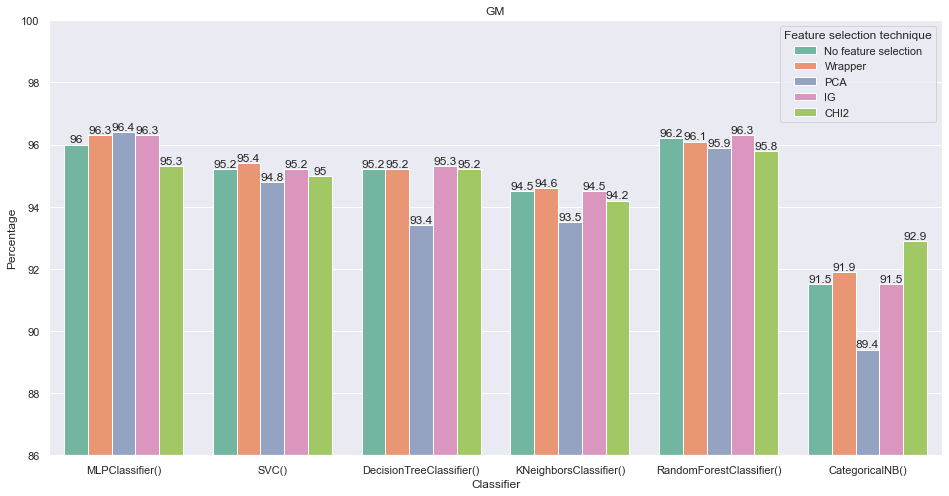

ValueError: min() arg is an empty sequence

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 8)})

for measure_name in MEASURE_NAMES:
    ax = sns.barplot(data=results[results["Measure"]==measure_name], x="Classifier", y="Percentage", hue="Feature selection technique", palette=sns.color_palette("Set2"))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(measure_name)
    plt.ylim((86, 100))
    plt.savefig(measure_name)
    plt.show()